In [34]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [36]:
# Verileri normalleştirelim
train_images = train_images / 255.0
test_images = test_images / 255.0

In [37]:
train_images.shape

(60000, 28, 28)

In [38]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Image Label : [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000

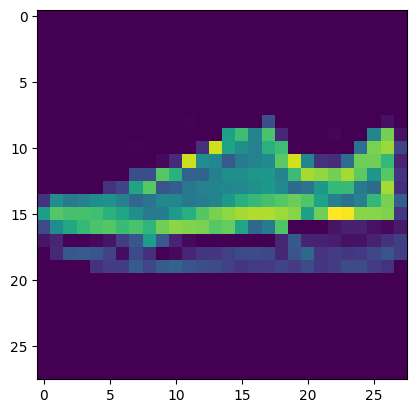

In [49]:
imgIndex = 9
image = test_images[imgIndex]
print("Image Label :",train_images[imgIndex])
plt.imshow(image)

In [39]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7731 - accuracy: 0.7193
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5286 - accuracy: 0.8090
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4672 - accuracy: 0.8310
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4308 - accuracy: 0.8447
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4081 - accuracy: 0.8525
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3891 - accuracy: 0.8585
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3740 - accuracy: 0.8636
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3588 - accuracy: 0.8699
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3463 - accuracy: 0.8735
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [46]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3712 - accuracy: 0.8649
Test accuracy: 0.8648999929428101


In [47]:
predictions = model.predict(test_images)
print('Prediction for the first image:', np.argmax(predictions[0]))

313/313 [==============================] - 1s 2ms/step
Prediction for the first image: 9


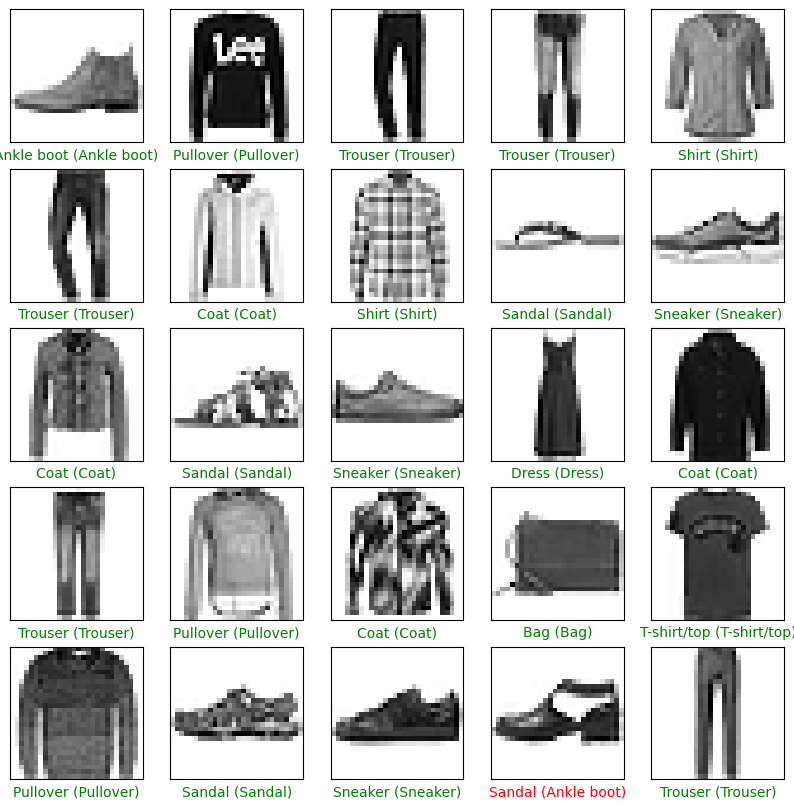

In [48]:
# Örnek görüntüleri ve tahminleri görselleştirelim
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                class_names[true_label]),
                                color=color)

plt.show()